# Taller 2

In [2]:
from pathlib import Path

import cv2 as cv
import matplotlib.pyplot as plt

import numpy as np

from skimage import exposure

##

## 1. Calibracion del histograma

In [3]:
img_1 = [
    Path("./img/1-hist-calibration/QUITO.png"),
]

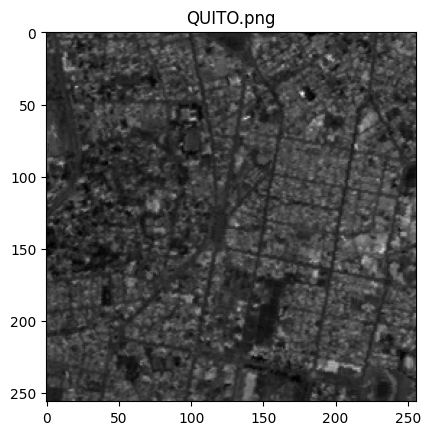

In [4]:
for path in img_1:
    img = cv.imread(path, cv.IMREAD_GRAYSCALE)
    plt.imshow(img, cmap="gray")
    plt.title(path.name)
    plt.show()

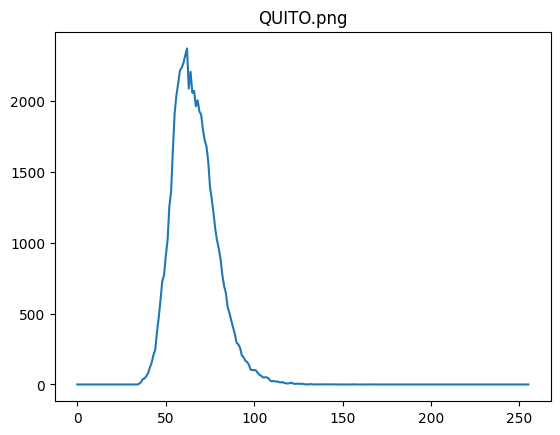

min 35, max 166


In [5]:
for path in img_1:
    hist = cv.calcHist([img], [0], None, [256], [0, 256])
    plt.plot(hist)
    plt.title(path.name)
    plt.show()

    print(f"min {np.min(img)}, max {np.max(img)}")

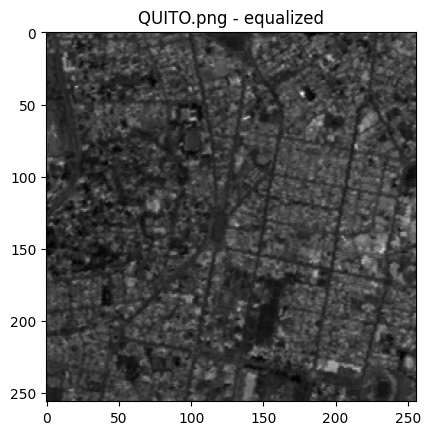

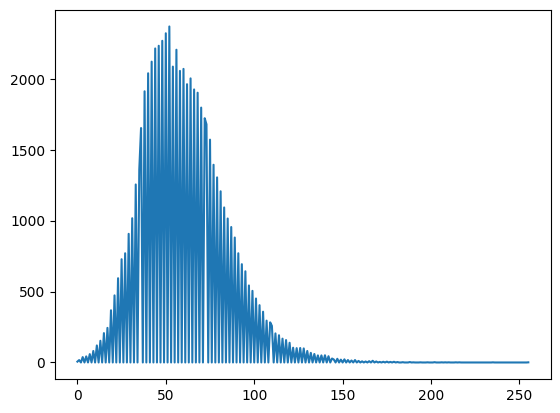

In [6]:
for path in img_1:
    img = cv.imread(path, cv.IMREAD_GRAYSCALE)

    rescaled_img = exposure.rescale_intensity(
        img, in_range=(35, 166), out_range=(0, 255)
    ).astype(np.uint8)

    plt.imshow(rescaled_img, cmap="gray")
    plt.title(f"{path.name} - equalized")
    plt.show()

    hist = cv.calcHist([rescaled_img], [0], None, [256], [0, 256])
    plt.plot(hist)
    plt.show()

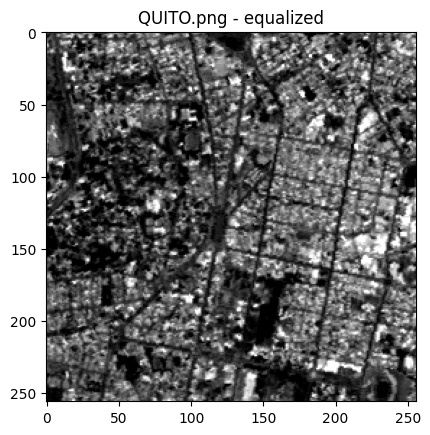

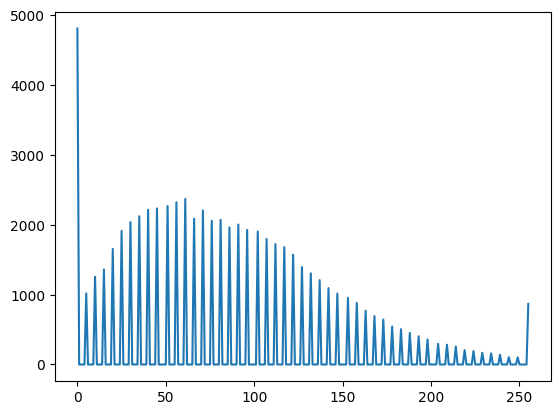

In [7]:
for path in img_1:
    img = cv.imread(path, cv.IMREAD_GRAYSCALE)

    rescaled_img = exposure.rescale_intensity(
        img, in_range=(50, 100), out_range=(0, 255)
    ).astype(np.uint8)

    plt.imshow(rescaled_img, cmap="gray")
    plt.title(f"{path.name} - equalized")
    plt.show()

    hist = cv.calcHist([rescaled_img], [0], None, [256], [0, 256])
    plt.plot(hist)
    plt.show()

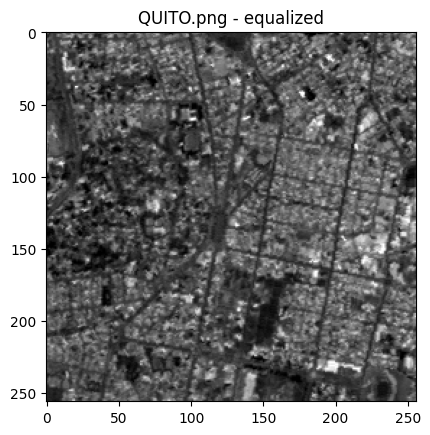

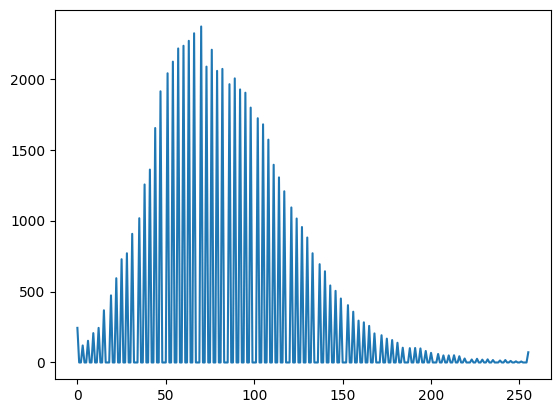

In [8]:
for path in img_1:
    img = cv.imread(path, cv.IMREAD_GRAYSCALE)

    rescaled_img = exposure.rescale_intensity(
        img, in_range=(40, 120), out_range=(0, 255)
    ).astype(np.uint8)

    plt.imshow(rescaled_img, cmap="gray")
    plt.title(f"{path.name} - equalized")
    plt.show()

    hist = cv.calcHist([rescaled_img], [0], None, [256], [0, 256])
    plt.plot(hist)
    plt.show()

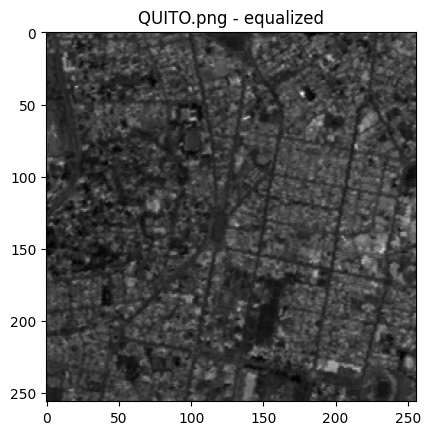

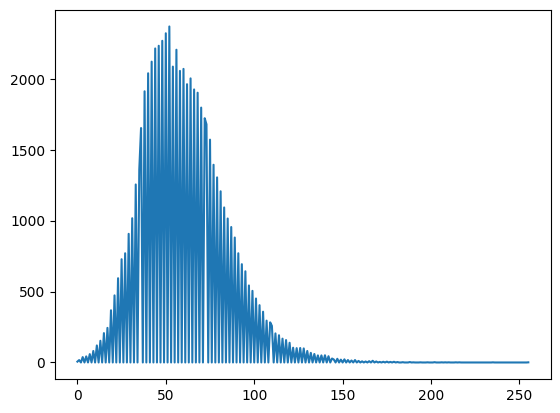

In [9]:
for path in img_1:
    img = cv.imread(path, cv.IMREAD_GRAYSCALE)

    rescaled_img = exposure.rescale_intensity(
        img, in_range=(35, 166), out_range=(0, 255)
    ).astype(np.uint8)

    plt.imshow(rescaled_img, cmap="gray")
    plt.title(f"{path.name} - equalized")
    plt.show()

    hist = cv.calcHist([rescaled_img], [0], None, [256], [0, 256])
    plt.plot(hist)
    plt.show()

La tranformacion que mas contraste genera es aquella de `50-100` en donde podemos apreciar mas diferenciacion entre los negros y blancos. Y la razon por que nuestra expansion de contraste de `35-166` es igual al punto 4 es porque el gris minimo y maximo concuerdan con ese mismo rango.

## 2. Ecualizacion del histograma

In [10]:
img_2 = [
    Path("./img/2-hist-equalization/BABOON.png"),
    Path("./img/2-hist-equalization/QUITO.png"),
]

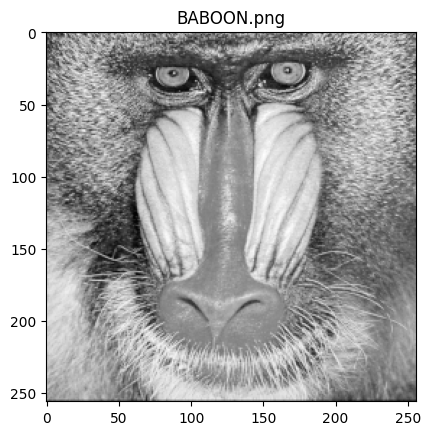

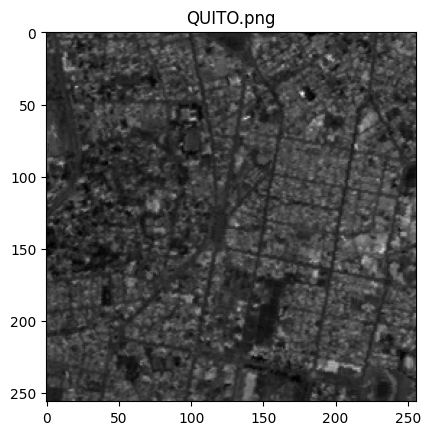

In [11]:
for path in img_2:
    img = cv.imread(path, cv.IMREAD_GRAYSCALE)
    plt.imshow(img, cmap="gray")
    plt.title(path.name)
    plt.show()

## 3. Comparacion histograma

In [12]:
img_3 = [Path("./img/3-hist-comparison/BOUGIES.png")]

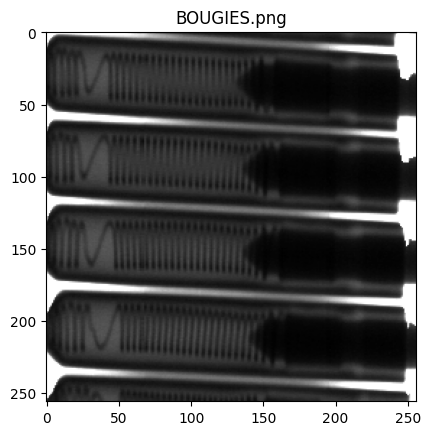

min 10, max 255


In [13]:
for path in img_3:
    img = cv.imread(path, cv.IMREAD_GRAYSCALE)
    plt.imshow(img, cmap="gray")
    plt.title(path.name)
    plt.show()

    print(f"min {np.min(img)}, max {np.max(img)}")

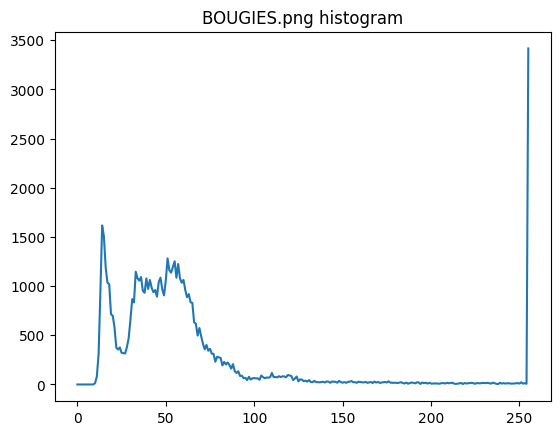

In [14]:
for path in img_3:
    img = cv.imread(path, cv.IMREAD_GRAYSCALE)
    hist = cv.calcHist([img], [0], None, [256], [0, 256])
    plt.plot(hist)
    plt.title(f"{path.name} histogram")
    plt.show()

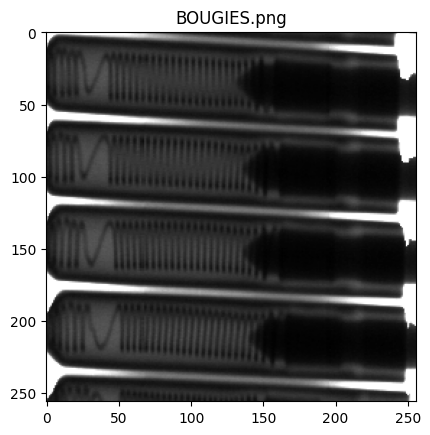

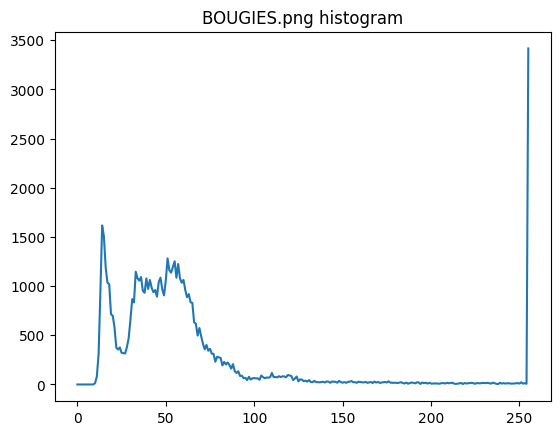

In [15]:
for path in img_3:
    img = cv.imread(path, cv.IMREAD_GRAYSCALE)

    img = exposure.rescale_intensity(
        img, in_range=(10, 255), out_range=(0, 255)
    ).astype(np.uint8)


    plt.imshow(img, cmap="gray")
    plt.title(path.name)
    plt.show()

    img = cv.imread(path, cv.IMREAD_GRAYSCALE)
    hist = cv.calcHist([img], [0], None, [256], [0, 256])
    plt.plot(hist)
    plt.title(f"{path.name} histogram")
    plt.show()

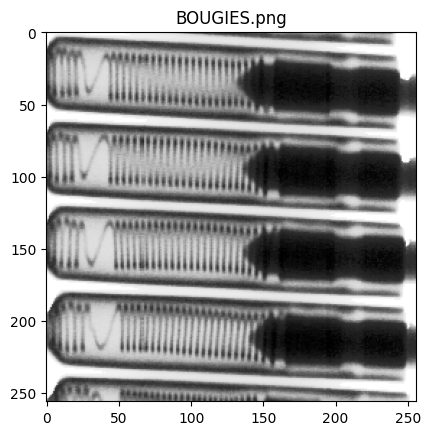

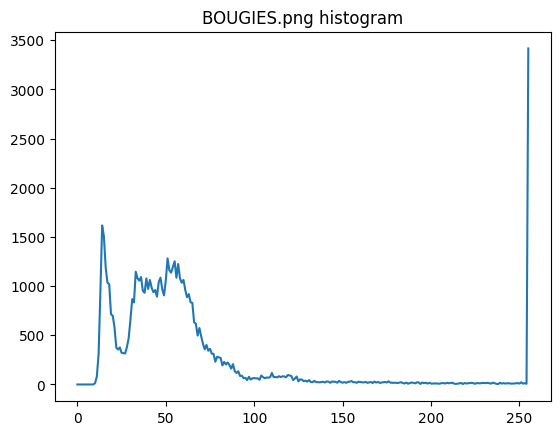

In [16]:
for path in img_3:
    img = cv.imread(path, cv.IMREAD_GRAYSCALE)

    img = cv.equalizeHist(img)

    plt.imshow(img, cmap="gray")
    plt.title(path.name)
    plt.show()

    img = cv.imread(path, cv.IMREAD_GRAYSCALE)
    hist = cv.calcHist([img], [0], None, [256], [0, 256])
    plt.plot(hist)
    plt.title(f"{path.name} histogram")
    plt.show()

## 4. Umbralizacion simple

In [17]:
img_4 = [Path("./img/4-threshold-simple/MUSCLE.png")]

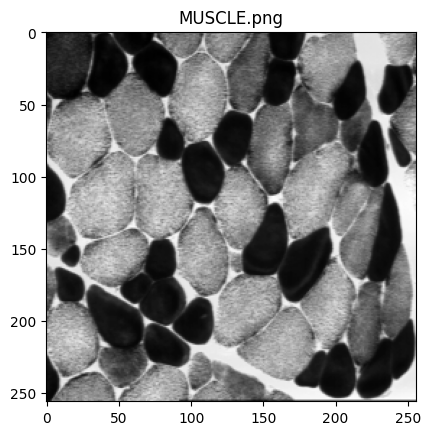

In [18]:
for path in img_4:
    img = cv.imread(path, cv.IMREAD_GRAYSCALE)
    plt.imshow(img, cmap="gray")
    plt.title(path.name)
    plt.show()

## 5. Umbralizacion doble

In [19]:
img_5 = [
    Path("./img/5-threshold-double/ANGIO.png"),
    Path("./img/5-threshold-double/RONDELLE.png"),
]

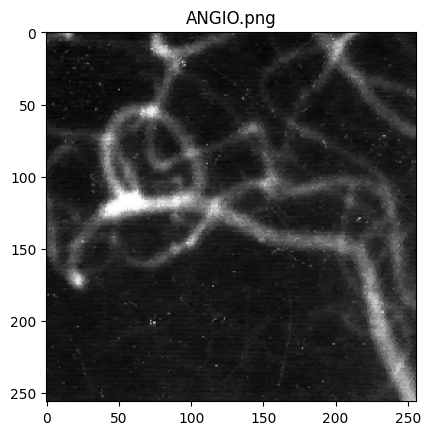

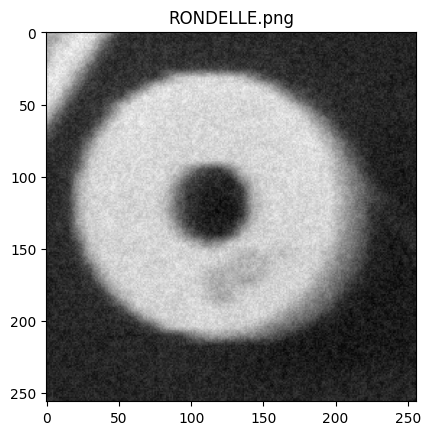

In [20]:
for path in img_5:
    img = cv.imread(path, cv.IMREAD_GRAYSCALE)
    plt.imshow(img, cmap="gray")
    plt.title(path.name)
    plt.show()

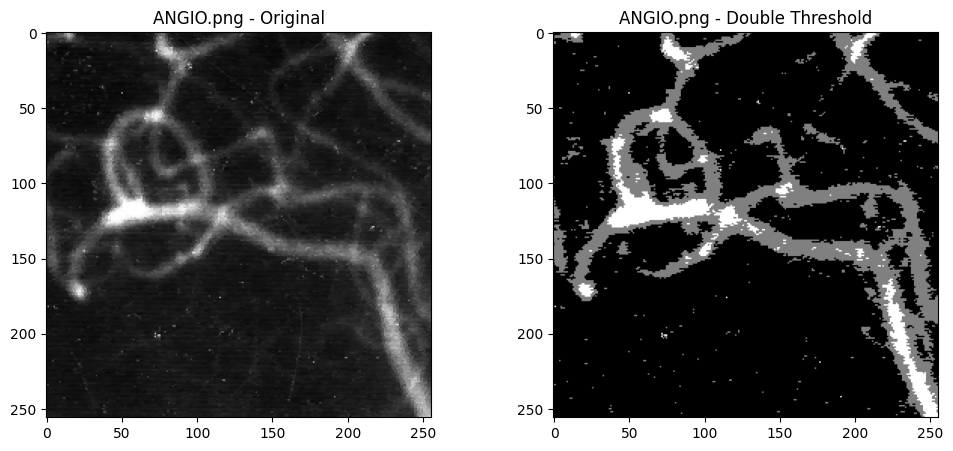

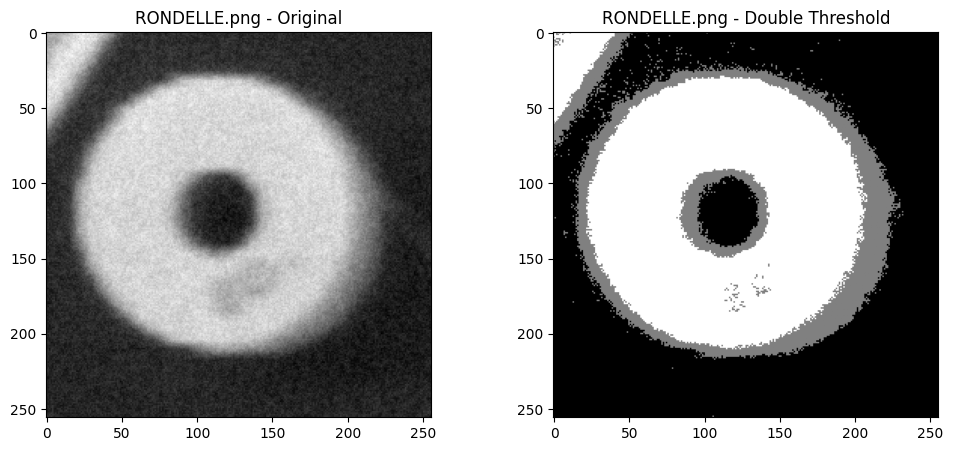

In [ ]:
lower_threshold = 70
upper_threshold = 140

for path in img_5:
    img = cv.imread(path, cv.IMREAD_GRAYSCALE)

    result = np.zeros_like(img)

    result[img < lower_threshold] = 0
    result[(img >= lower_threshold) & (img < upper_threshold)] = 128
    result[img >= upper_threshold] = 255

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap="gray")
    plt.title(f"{path.name} - Original")

    plt.subplot(1, 2, 2)
    plt.imshow(result, cmap="gray")
    plt.title(f"{path.name} - Double Threshold")

    plt.show()